<b>Download the file research-papers.csv from the link below:<b>

https://mitu.co.in/dataset

<b>This file contains the collection research papers received in different categories.<b>

<b>Perform the following operations on it:<b>

1. Read the file
2. Seperate input (summary) and output data (primary category)
3. Explore the output data
4. Prepare and vectorize the data
5. Cross validate the data
6. Build the KNN model for classification with neighbors = 6
7. Evaluate the performance of algorithm

<b>1. Read the file<b>

In [1]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('research-papers.csv')

In [3]:
df

Unnamed: 0              id  \
0               0    cs/9308101v1   
1               1    cs/9308102v1   
2               2    cs/9309101v1   
3               3    cs/9311101v1   
4               4    cs/9311102v1   
...           ...             ...   
53469       53469  math/0603084v1   
53470       53470  math/0603123v1   
53471       53471  math/0603130v1   
53472       53472  math/0603132v1   
53473       53473  math/0603134v1   

                                                   Title  \
0                                   Dynamic Backtracking   
1      A Market-Oriented Programming Environment and ...   
2                An Empirical Analysis of Search in GSAT   
3      The Difficulties of Learning Logic Programs wi...   
4      Software Agents: Completing Patterns and Const...   
...                                                  ...   
53469  Advances on nonparametric regression for funct...   
53470  Ranking and empirical minimization of U-statis...   
53471  Nonparametric methods for inference in the pre...   
53472  Functional linear regression analysis for long...   
53473  Nonquadratic estimators of a quadratic functional   

                                                 Summary             Author  \
0      Because of their occasional need to return to ...     M. L. Ginsberg   
1      Market price systems constitute a well-underst...      M. P. Wellman   
2      We describe an extensive study of search in GS...         I. P. Gent   
3      As real logic programmers normally use cut (!)...       F. Bergadano   
4      To support the goal of allowing users to recor...    J. C. Schlimmer   
...                                                  ...                ...   
53469  We consider the problem of predicting a real r...   Frédéric Ferraty   
53470  The problem of ranking/ordering instances, ins...  Stéphan Clémençon   
53471  We suggest two nonparametric approaches, based...         Peter Hall   
53472  We propose nonparametric methods for functiona...           Fang Yao   
53473  Estimation of a quadratic functional over para...        T. Tony Cai   

                                      Link          Publish Date  \
0        http://arxiv.org/pdf/cs/9308101v1  1993-08-01T00:00:00Z   
1        http://arxiv.org/pdf/cs/9308102v1  1993-08-01T00:00:00Z   
2        http://arxiv.org/pdf/cs/9309101v1  1993-09-01T00:00:00Z   
3        http://arxiv.org/pdf/cs/9311101v1  1993-11-01T00:00:00Z   
4        http://arxiv.org/pdf/cs/9311102v1  1993-11-01T00:00:00Z   
...                                    ...                   ...   
53469  http://arxiv.org/pdf/math/0603084v1  2006-03-03T13:25:42Z   
53470  http://arxiv.org/pdf/math/0603123v1  2006-03-05T17:10:54Z   
53471  http://arxiv.org/pdf/math/0603130v1  2006-03-06T07:31:27Z   
53472  http://arxiv.org/pdf/math/0603132v1  2006-03-06T08:09:42Z   
53473  http://arxiv.org/pdf/math/0603134v1  2006-03-06T09:11:59Z   

                Update Date Primary Category  \
0      1993-08-01T00:00:00Z            cs.AI   
1      1993-08-01T00:00:00Z            cs.AI   
2      1993-09-01T00:00:00Z            cs.AI   
3      1993-11-01T00:00:00Z            cs.AI   
4      1993-11-01T00:00:00Z            cs.AI   
...                     ...              ...   
53469  2006-03-03T13:25:42Z          math.ST   
53470  2006-03-05T17:10:54Z          math.ST   
53471  2006-03-06T07:31:27Z          math.ST   
53472  2006-03-06T08:09:42Z          math.ST   
53473  2006-03-06T09:11:59Z          math.ST   

                                                Category  
0                                              ['cs.AI']  
1                                              ['cs.AI']  
2                                              ['cs.AI']  
3                                              ['cs.AI']  
4                                              ['cs.AI']  
...                                                  ...  
53469                             ['math.ST', 'stat.TH']  
53470  ['math.ST', 'stat.T

<b> 2. Seperate input (summary) and output data (primary category)<b>

In [4]:
print(df.columns)

Index(['Unnamed: 0', 'id', 'Title', 'Summary', 'Author', 'Link',
       'Publish Date', 'Update Date', 'Primary Category', 'Category'],
      dtype='object')


In [5]:
x = df['Summary']
y = df['Primary Category']

In [6]:
set(y)

{'astro-ph.CO',
 'astro-ph.EP',
 'astro-ph.GA',
 'astro-ph.HE',
 'astro-ph.IM',
 'astro-ph.SR',
 'comp-gas',
 'cond-mat',
 'cond-mat.dis-nn',
 'cond-mat.mes-hall',
 'cond-mat.mtrl-sci',
 'cond-mat.other',
 'cond-mat.quant-gas',
 'cond-mat.soft',
 'cond-mat.stat-mech',
 'cond-mat.str-el',
 'cond-mat.supr-con',
 'cs.AI',
 'cs.AR',
 'cs.CC',
 'cs.CE',
 'cs.CG',
 'cs.CL',
 'cs.CR',
 'cs.CV',
 'cs.CY',
 'cs.DB',
 'cs.DC',
 'cs.DL',
 'cs.DM',
 'cs.DS',
 'cs.ET',
 'cs.FL',
 'cs.GL',
 'cs.GR',
 'cs.GT',
 'cs.HC',
 'cs.IR',
 'cs.IT',
 'cs.LG',
 'cs.LO',
 'cs.MA',
 'cs.MM',
 'cs.MS',
 'cs.NA',
 'cs.NE',
 'cs.NI',
 'cs.OH',
 'cs.OS',
 'cs.PF',
 'cs.PL',
 'cs.RO',
 'cs.SC',
 'cs.SD',
 'cs.SE',
 'cs.SI',
 'cs.SY',
 'econ.EM',
 'econ.GN',
 'econ.TH',
 'eess.AS',
 'eess.IV',
 'eess.SP',
 'eess.SY',
 'gr-qc',
 'hep-ex',
 'hep-lat',
 'hep-ph',
 'hep-th',
 'math-ph',
 'math.AC',
 'math.AG',
 'math.AP',
 'math.AT',
 'math.CA',
 'math.CO',
 'math.CT',
 'math.CV',
 'math.DG',
 'math.DS',
 'math.FA',
 'math

In [7]:
len(set(y))

154

<b>3. Explore the output data<b>

In [8]:
plt.figure(figsize=(100,100))

plt.xticks(rotation=90)

sns.countplot(y = df['Primary Category']);

In [9]:
y.value_counts()

Primary Category
math.ST               702
math-ph               701
cs.IT                 700
cond-mat.stat-mech    383
cond-mat.soft         373
                     ... 
q-fin.ST              123
comp-gas              114
cs.GL                 104
physics.atom-ph       100
cond-mat                4
Name: count, Length: 154, dtype: int64

In [10]:
plt.figure(figsize=(100,100))

plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%2.2f%%');

<b>4. Prepare and vectorize the data<b>

In [11]:
import re, string

In [12]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
def CleanResearch(researchText):
    researchText = re.sub('https\S+\s*', ' ', researchText) 
    researchText = re.sub('RT|cc', ' ', researchText) 
    researchText = re.sub('#\S+', ' ', researchText)
    researchText = re.sub('@\S+', ' ', researchText) 
    researchText = re.sub('[%s]' % re.escape(string.punctuation), ' ', researchText) 
    researchText = re.sub(r'\x00-\x7f]', r' ', researchText)
    researchText = re.sub('\s+', ' ', researchText)
    return researchText

In [14]:
CleanResearch(df['Summary'] [123])

'The goal of the LP project at the K U Leuven is to design an expressive logic suitable for declarative knowledge representation and to develop intelligent systems based on Logic Programming technology for solving computational problems using the declarative specifications The ID logic is an integration of typed classical logic and a definition logic Different abductive solvers for this language are being developed This paper is a report of the integration of high order aggregates into ID logic and the consequences on the solver SLDNFA '

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
tfidf = TfidfVectorizer(stop_words='english')

In [17]:
cleaned = x.apply(lambda a: CleanResearch(a))

In [18]:
cleaned

0        Because of their o asional need to return to s...
1        Market price systems constitute a well underst...
2        We describe an extensive study of search in GS...
3        As real logic programmers normally use cut an ...
4        To support the goal of allowing users to recor...
                               ...                        
53469    We consider the problem of predicting a real r...
53470    The problem of ranking ordering instances inst...
53471    We suggest two nonparametric approaches based ...
53472    We propose nonparametric methods for functiona...
53473    Estimation of a quadratic functional over para...
Name: Summary, Length: 53474, dtype: object

In [19]:
x_vect = tfidf.fit_transform(cleaned)

In [20]:
x_vect.shape

(53474, 86169)

In [21]:
tfidf.get_feature_names_out()

array(['00', '000', '00000000001', ..., 'zynga', 'zynq', 'zz'],
      dtype=object)

<b>5. Cross validate the data<b>

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_vect, y, random_state=0)

In [24]:
x_train.shape

(40105, 86169)

In [25]:
x_test.shape

(13369, 86169)

<b>6. Build the KNN model for classification with neighbors = 6<b>

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn = KNeighborsClassifier(n_neighbors=6)

In [28]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

<b>7. Evaluate the performance of algorithm<b>

In [70]:
y_pred = knn.predict(x_test)

In [30]:
y_pred

array(['cs.OS', 'math.GR', 'cond-mat.supr-con', ..., 'cs.FL', 'q-fin.PR',
       'math.GR'], dtype=object)

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

<Figure size 10000x10000 with 0 Axes>

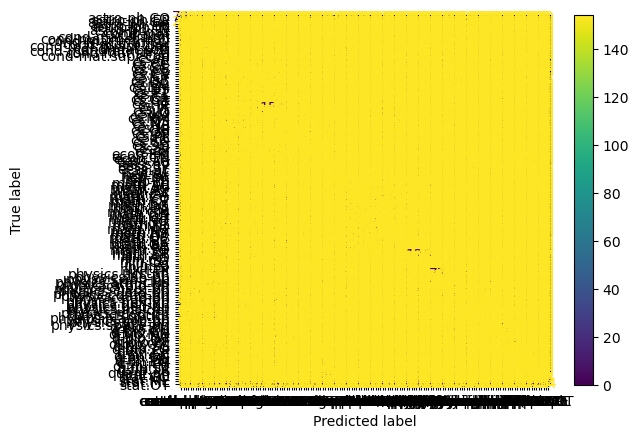

In [32]:
plt.figure(figsize = (100,100))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [33]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[79,  1, 14, ...,  0,  0,  0],
       [ 2, 73,  2, ...,  0,  0,  0],
       [22,  1, 47, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 20,  1,  2],
       [ 0,  0,  0, ...,  0, 12,  0],
       [ 1,  0,  0, ...,  9,  1, 14]], dtype=int64)

In [34]:
accuracy_score(y_test, y_pred)

0.46383424339890794

<b>Download the file sarcasm-clusters.txt from the link below:<b>

https://mitu.co.in/datase

t<b>
This file contains the collection unlabeled tweets where few are sarcastic and f w
are n<b>
o<b>t.
Perform the following operations on<b>
 it:
1. Read the file
2. Clean, Prepare and vectorize the data
3. Build the K-means clustering algorithm with 2 clusters.
4. Show the tweets with 0 and 1 labels respectively.
5. Find and print sarcastic and non-sarcastic tweet’s top 10 words each.

<b>1. Read the file<b>

In [35]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

In [36]:
with open('sarcasm-clusters.txt', 'r', encoding='utf-8') as f:
    sarcasm = [line.strip() for line in f.readlines()]

In [37]:
sarcasm

["It feels like just a few days ago it was the last day of school . Now it's the end of July . 😐",
 "I love my mom . No matter what we go through , no matter how much we argue , because I know , at the end , she'll always be there .",
 'Bump that music ... #imtryingtosleep',
 "Mexican and black jokes are pretty much the same . Once you've heard Juan , you've heard Jamal .",
 'How to find work you love :',
 '"@WolfpackAlan : You know what I like to do ? Answer my own questions . "" @elenecoetzer"',
 'You seem like a basketball player ! — I am Thank you !',
 'Just because you say Swag in every other sentence doesnt mean you have it .',
 "if i had my license the only thing i'd use it for is mcdonalds at 3am",
 'When people give me directions I tend to concentrate very hard on trying to look attentive and I forget to listen .',
 '@pitchfork @EODMofficial WE LOVE YOU ! STAY SAFE WHEREVER YOU ARE !',
 "RT Every country has an Independence Day except Britain because they're the one's everyone

In [38]:
len(sarcasm)

51189

In [39]:
print(sarcasm[0][0])

I


<b>2. Clean, Prepare and vectorize the data<b>

In [40]:
df = pd.DataFrame.from_records([{'sarcasm_text': row} for row in sarcasm], columns=['sarcasm_text'])

In [41]:
df

sarcasm_text
0      It feels like just a few days ago it was the l...
1      I love my mom . No matter what we go through ,...
2                   Bump that music ... #imtryingtosleep
3      Mexican and black jokes are pretty much the sa...
4                            How to find work you love :
...                                                  ...
51184  RT My EX had one very annoying habit . Breathi...
51185  Some days you're the Titanic , some days you'r...
51186  Congrats on the release of 25 @Adele , let's h...
51187                  doing my favorite thing .. crying
51188  @TheSupremEC0URT roommate of the week really l...

[51189 rows x 1 columns]

In [42]:
print(df.loc[3,'sarcasm_text'])

Mexican and black jokes are pretty much the same . Once you've heard Juan , you've heard Jamal .


In [43]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer

In [44]:
swords=stopwords.words('english')
ls = LancasterStemmer()

In [45]:
def clean_text(sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [x.lower() for x in tokens1 if x.isalpha()]
    tokens3 = [x.lower() for x in tokens2 if x not in swords]
    tokens4 = [ls.stem(x) for x in tokens3]
    return tokens4

In [46]:
sent = 'Hey! We are currently doing the second part of our assignment four using Python Programming.'

In [47]:
clean_text(sent)

['hey', 'cur', 'second', 'part', 'assign', 'four', 'us', 'python', 'program']

In [48]:
clean_text(str(df.loc[3, 'sarcasm_text']))

['mex', 'black', 'jok', 'pretty', 'much', 'heard', 'juan', 'heard', 'jam']

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
tfidf = TfidfVectorizer(analyzer=clean_text)

In [51]:
x_vect = tfidf.fit_transform( df['sarcasm_text'])

In [52]:
x_vect.shape

(51189, 33097)

In [53]:
tfidf.get_feature_names_out()

array(['aa', 'aaa', 'aaaaa', ..., '화양연화', 'ｒｅｔｗｅｅｔ', 'ﾉ'], dtype=object)

<b>3.Build the K-means clustering algorithm with 2 clusters.<b>

In [54]:
from sklearn.cluster import KMeans

km = KMeans(random_state=0, n_clusters=2)

In [55]:
labels = km.fit_predict(x_vect)

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<b>4. Show the tweets with 0 and 1 labels respectively.<b>

In [56]:
labels = km.fit_predict(x_vect)

In [57]:
km.labels_

array([0, 1, 0, ..., 0, 0, 0])

In [58]:
newdf = df.copy()
newdf

sarcasm_text
0      It feels like just a few days ago it was the l...
1      I love my mom . No matter what we go through ,...
2                   Bump that music ... #imtryingtosleep
3      Mexican and black jokes are pretty much the sa...
4                            How to find work you love :
...                                                  ...
51184  RT My EX had one very annoying habit . Breathi...
51185  Some days you're the Titanic , some days you'r...
51186  Congrats on the release of 25 @Adele , let's h...
51187                  doing my favorite thing .. crying
51188  @TheSupremEC0URT roommate of the week really l...

[51189 rows x 1 columns]

In [59]:
newdf['label'] = labels

In [60]:
newdf

sarcasm_text  label
0      It feels like just a few days ago it was the l...      0
1      I love my mom . No matter what we go through ,...      1
2                   Bump that music ... #imtryingtosleep      0
3      Mexican and black jokes are pretty much the sa...      0
4                            How to find work you love :      1
...                                                  ...    ...
51184  RT My EX had one very annoying habit . Breathi...      0
51185  Some days you're the Titanic , some days you'r...      0
51186  Congrats on the release of 25 @Adele , let's h...      0
51187                  doing my favorite thing .. crying      0
51188  @TheSupremEC0URT roommate of the week really l...      0

[51189 rows x 2 columns]

In [61]:
zero = newdf[labels==0]
zero

sarcasm_text  label
0      It feels like just a few days ago it was the l...      0
2                   Bump that music ... #imtryingtosleep      0
3      Mexican and black jokes are pretty much the sa...      0
5      "@WolfpackAlan : You know what I like to do ? ...      0
6      You seem like a basketball player ! — I am Tha...      0
...                                                  ...    ...
51184  RT My EX had one very annoying habit . Breathi...      0
51185  Some days you're the Titanic , some days you'r...      0
51186  Congrats on the release of 25 @Adele , let's h...      0
51187                  doing my favorite thing .. crying      0
51188  @TheSupremEC0URT roommate of the week really l...      0

[45522 rows x 2 columns]

In [62]:
one = newdf[labels==1]
one

sarcasm_text  label
1      I love my mom . No matter what we go through ,...      1
4                            How to find work you love :      1
10     @pitchfork @EODMofficial WE LOVE YOU ! STAY SA...      1
15     I love it when the bus smells like cat piss an...      1
27     Love means never being able to like another gi...      1
...                                                  ...    ...
51132  If you want to understand how economists think...      1
51133  I LOVE being ignored . Especially by you . #wa...      1
51164  @ddlovato god only knows how proud I am of you...      1
51174  @CNNPolitics CNN loves this posting ! Seems th...      1
51181                           I love dance class ... 😔      1

[5667 rows x 2 columns]

<b>5.Find and print sarcastic and non-sarcastic tweet’s top 10 words each.<b>

In [63]:
from nltk  import FreqDist

In [64]:
text = []
for t in zero ['sarcasm_text']:
    text.extend(clean_text(t))

In [65]:
freq = FreqDist(text)

In [66]:
def clean_text(sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [x.lower() for x in tokens1 if x.isalpha()]
    tokens3 = [x.lower() for x in tokens2 if x not in swords]
    return tokens3

In [67]:
zero = df[labels==0]
text = []
for t in zero ['sarcasm_text']:
    text.extend(clean_text(t))

freq = FreqDist(text)
freq.most_common(10)

[('like', 3761),
 ('get', 2472),
 ('day', 2321),
 ('people', 2174),
 ('great', 2051),
 ('good', 2045),
 ('one', 1843),
 ('rt', 1785),
 ('time', 1676),
 ('really', 1656)]

In [68]:
one = df[labels==1]
text = []
for t in one ['sarcasm_text']:
    text.extend(clean_text(t))

freq = FreqDist(text)
freq.most_common(10)

[('love', 5610),
 ('much', 479),
 ('like', 397),
 ('u', 387),
 ('day', 382),
 ('people', 299),
 ('happy', 264),
 ('get', 237),
 ('one', 220),
 ('know', 207)]

In [72]:
km.fit_predict(x_vect)

cluster_centers = km.cluster_centers_

non_sarcastic_top_words = tfidf.get_feature_names_out()[cluster_centers[0].argsort()[:10]]
print("Non sarcastic top 10:", non_sarcastic_top_words)
sarcastic_top_words = tfidf.get_feature_names_out()[cluster_centers[1].argsort()[:10]]
print("Sarcastic top 10:", sarcastic_top_words)

Non sarcastic top 10: ['timefram' 'willienelson' 'carrel' 'psysurpr' 'psychonaut' 'soso'
 'ichicoroy' 'willard' 'casamiagroup' 'précilia']
Sarcastic top 10: ['aa' 'nvm' 'nv' 'nuzzl' 'nuvo' 'nuv' 'nutyah' 'nutr' 'nutleaf' 'nutjob']
